In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [3]:
boston = load_boston()
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston["feature_names"]

In [6]:
type(boston)

sklearn.utils.Bunch

In [5]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1)

In [36]:
y_data.shape, x_data.shape


((506, 1), (506, 13))

In [37]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(
    feature_range=(0,5)).fit(x_data)
# standard_scale = preprocessing.StandardScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [40]:
model = keras.models.Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(13,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [42]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(
    loss='mean_squared_error', optimizer='sgd', metrics=['mse', 'mae'])

model.compile(
    loss='mean_squared_error', optimizer=sgd, metrics=['mse', 'mae'])

# model.compile(loss='mean_squared_error', optimizer=sgd)

In [43]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 339 samples, validate on 167 samples
Epoch 1/100
339/339 [==============================] - 0s 341us/sample - loss: 513.7465 - mse: 513.7465 - mae: 20.6135 - val_loss: 378.9998 - val_mse: 378.9998 - val_mae: 17.3551
Epoch 2/100
339/339 [==============================] - 0s 17us/sample - loss: 335.4484 - mse: 335.4484 - mae: 15.7004 - val_loss: 229.8480 - val_mse: 229.8480 - val_mae: 12.4786
Epoch 3/100
339/339 [==============================] - 0s 16us/sample - loss: 205.3612 - mse: 205.3612 - mae: 11.2619 - val_loss: 143.7422 - val_mse: 143.7422 - val_mae: 9.0576
Epoch 4/100
339/339 [==============================] - 0s 16us/sample - loss: 136.6974 - mse: 136.6974 - mae: 8.5350 - val_loss: 99.9267 - val_mse: 99.9267 - val_mae: 7.1075
Epoch 5/100
339/339 [==============================] - 0s 17us/sample - loss: 104.3470 - mse: 104.3470 - mae: 7.1710 - val_loss: 83.9364 - val_mse: 83.9364 - val_mae: 6.3990
Epoch 6/100
339/339 [==============================] - 0s 16us/sample - 

339/339 [==============================] - 0s 16us/sample - loss: 58.3019 - mse: 58.3019 - mae: 5.3289 - val_loss: 50.1842 - val_mse: 50.1842 - val_mae: 4.9823
Epoch 49/100
339/339 [==============================] - 0s 17us/sample - loss: 57.6088 - mse: 57.6088 - mae: 5.2206 - val_loss: 49.5152 - val_mse: 49.5152 - val_mae: 5.0355
Epoch 50/100
339/339 [==============================] - 0s 18us/sample - loss: 56.9418 - mse: 56.9418 - mae: 5.3461 - val_loss: 49.0087 - val_mse: 49.0087 - val_mae: 4.9062
Epoch 51/100
339/339 [==============================] - 0s 19us/sample - loss: 56.3661 - mse: 56.3661 - mae: 5.1891 - val_loss: 48.3898 - val_mse: 48.3898 - val_mae: 4.9689
Epoch 52/100
339/339 [==============================] - 0s 18us/sample - loss: 55.6282 - mse: 55.6282 - mae: 5.1662 - val_loss: 48.1205 - val_mse: 48.1205 - val_mae: 5.0844
Epoch 53/100
339/339 [==============================] - 0s 17us/sample - loss: 55.1036 - mse: 55.1036 - mae: 5.2513 - val_loss: 47.5736 - val_mse: 4

In [44]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test :', score[1:])

Test loss: 29.81873160493588
Test : [29.818733, 3.9432845]


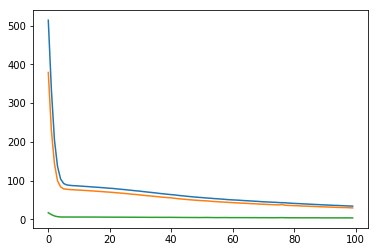

In [45]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_mse'])
pyplot.plot(history.history['val_mae'])
pyplot.show()